In [2]:
import os
import numpy as np
import librosa
import pickle
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd
import time



In [3]:

def extract_mfcc(audio_data, sample_rate):
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfccs


model_path = 'D:\college\Final Year Project\hindimarathi model\model.h5'
model = tf.keras.models.load_model(model_path)


label_encoder_path = 'D:\college\Final Year Project\hindimarathi model\label_encoder.pkl'
with open(label_encoder_path, 'rb') as file:
    label_encoder = pickle.load(file)


In [4]:

def predict_language(audio_data, sample_rate):
    test_point = extract_mfcc(audio_data, sample_rate)
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    prediction = model.predict(test_point)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])[0]
    predicted_probabilities = prediction[0]
    if predicted_label == 0:
        print("Hindi")
    elif predicted_label == 1:
        print("Marathi")
    elif predicted_label == 2:
        print("English")
    
    print("Prediction Probabilities:")
    for i, prob in enumerate(predicted_probabilities):
        print(label_encoder.classes_[i], ": ", prob)
    
    audio, sr = librosa.load(filename)
       
    
    
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()
    
    return predicted_label


In [5]:

def process_recorded_audio(filename):
    audio, sample_rate = librosa.load(filename, sr=None)
    predicted_language = predict_language(audio, sample_rate)
    print("Predicted Language:", predicted_language)


def record_audio(duration):
    sample_rate = 3000
    print("Recording audio for {} seconds...".format(duration))
    audio = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=1)
    sd.wait()
    print("Recording complete.")
       # Play the recorded audio
    print("Playing recorded audio...")
    sd.play(audio, sample_rate)
    sd.wait()
    print("Playback complete.")
    filename = "recorded_audio.wav"
    sf.write(filename, audio, sample_rate)
    return filename


In [6]:

recording_duration = 10


Recording audio for 10 seconds...
Recording complete.
Playing recorded audio...
Playback complete.
1/1 [==============================] - 0s 319ms/step
Hindi
Prediction Probabilities:
0 :  0.99966645
1 :  0.00033358936
2 :  3.0865252e-13


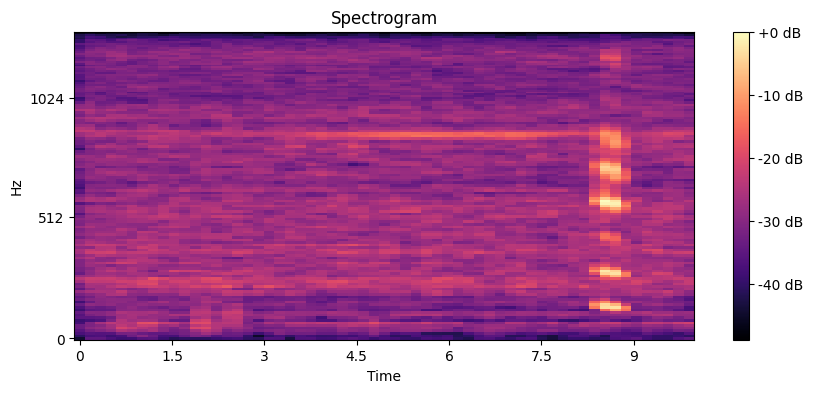

Predicted Language: 0


In [7]:

filename = record_audio(recording_duration)
process_recorded_audio(filename)

In [7]:
import os
import soundfile as sf
import librosa

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\Hindi"


# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_sample_rate = 0
num_files = 0

# Iterate over each audio file and calculate the total sample rate
for audio_file in audio_files:
    if audio_file.endswith('.wav'):
        audio, sample_rate = sf.read(audio_file)
    elif audio_file.endswith('.mp3'):
        audio, sample_rate = librosa.load(audio_file, sr=None)
    else:
        continue
    
    total_sample_rate += sample_rate
    num_files += 1

# Calculate the average sample rate
average_sample_rate = total_sample_rate / num_files

print("Average Sample Rate:", average_sample_rate)


In [ ]:

import os
import soundfile as sf
import librosa

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\Marathi"


# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_sample_rate = 0
num_files = 0

# Iterate over each audio file and calculate the total sample rate
for audio_file in audio_files:
    if audio_file.endswith('.wav'):
        audio, sample_rate = sf.read(audio_file)
    elif audio_file.endswith('.mp3'):
        audio, sample_rate = librosa.load(audio_file, sr=None)
    else:
        continue
    
    total_sample_rate += sample_rate
    num_files += 1

# Calculate the average sample rate
average_sample_rate = total_sample_rate / num_files

print("Average Sample Rate:", average_sample_rate)


Average Sample Rate: 17308.377410765686


In [ ]:
import os
import soundfile as sf

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\Hindi"

# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_duration = 0
num_files = 0

# Iterate over each audio file and calculate the total duration
for audio_file in audio_files:
    audio, sample_rate = sf.read(audio_file)
    duration = len(audio) / sample_rate
    total_duration += duration
    num_files += 1

# Calculate the average duration
average_duration = total_duration / num_files

print("Average Length:", average_duration, "seconds")


Average Length: 3.8121165362486997 seconds


In [ ]:
import os
import soundfile as sf

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\Marathi"

# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_duration = 0
num_files = 0

# Iterate over each audio file and calculate the total duration
for audio_file in audio_files:
    audio, sample_rate = sf.read(audio_file)
    duration = len(audio) / sample_rate
    total_duration += duration
    num_files += 1

# Calculate the average duration
average_duration = total_duration / num_files

print("Average Length:", average_duration, "seconds")


Average Length: 4.446731313452029 seconds


In [ ]:
import os
import soundfile as sf

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\English"

# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_duration = 0
num_files = 0

# Iterate over each audio file and calculate the total duration
for audio_file in audio_files:
    audio, sample_rate = sf.read(audio_file)
    duration = len(audio) / sample_rate
    total_duration += duration
    num_files += 1

# Calculate the average duration
average_duration = total_duration / num_files

print("Average Length:", average_duration, "seconds")


Average Length: 7.71405335545114 seconds


In [ ]:

import os
import soundfile as sf
import librosa

# Path to the directory containing the audio dataset
dataset_dir = r"D:\college\sem6\POWEER\eng\eng1\English"


# List all audio files in the dataset directory
audio_files = [os.path.join(dataset_dir, filename) for filename in os.listdir(dataset_dir) if
               filename.endswith(('.wav', '.mp3'))]

# Initialize variables
total_sample_rate = 0
num_files = 0

# Iterate over each audio file and calculate the total sample rate
for audio_file in audio_files:
    if audio_file.endswith('.wav'):
        audio, sample_rate = sf.read(audio_file)
    elif audio_file.endswith('.mp3'):
        audio, sample_rate = librosa.load(audio_file, sr=None)
    else:
        continue
    
    total_sample_rate += sample_rate
    num_files += 1

# Calculate the average sample rate
average_sample_rate = total_sample_rate / num_files

print("Average Sample Rate:", average_sample_rate)


Average Sample Rate: 16003.795066413662
